# Introduction 

A preliminary exploration of the Florida state data obtained from EODataScape using pandas and visualization libraries.

In [85]:
#import statements
import pandas as pd
import numpy as np

#visualizations
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt



### Exploring EODataScape FLORIDA Data

This is a simple examination of the csv file downloaded from https://eodatascape.datakind.org/explore-data filtered for the state of Florida. The specific data features selected can be seen below. The dataframe was transposed to easily identify all features selected, and the data points, in the following case, are shown at the column level.

In [129]:
#importing data from a download from the datakind pipeline https://eodatascape.datakind.org/explore-data
df = pd.read_csv('data.csv')
df.head(5).T

,0,1,2,3,4
geoid,12001000202,12001000301,12001000700,12001000902,12001001000
geoid_year,2020,2020,2020,2020,2020
state,Florida,Florida,Florida,Florida,Florida
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County
state_fips_code,12,12,12,12,12
county_fips_code,1,1,1,1,1
lihtc_qualified_tracts,1,0,1,0,0
housecost_med_est,1100,852,869,738,1198
housecost_med_moe,123,68,110,25,143
housecost_owner_est,563,815,818,-666666666,888


### The data succesfully loaded from the download. Let's first perform a quick sanity check.
The main purpose of this sanity check to to ensure that only data from the selected state has been recorded.

In [81]:
print('')
print('The total number of rows in our table is: ', df.shape[0])
print('The total number of columns in our table is: ', df.shape[1])
print('')
print('-' * 75)
print('')
unique_states = df['state'].unique()
unique_years = df['geoid_year'].unique()
print('The target state is: ', unique_states)
print('')
print('=' * 75)
print('')
print('The number of STATE rows with missing data is: ', df['state'].isnull().sum())
print('The total number of COUNTIES observed is: ', df['county'].nunique())
print('The number of COUNTIES rows with missing data is: ', df['county'].isnull().sum())
print('')
print('=' * 75)
print('')
print('The date range for this data covers the following year(s): ' ,unique_years)
print('')


The total number of rows in our table is:  5160
The total number of columns in our table is:  52

---------------------------------------------------------------------------

The target state is:  [' Florida']


The number of STATE rows with missing data is:  0
The total number of COUNTIES observed is:  67
The number of COUNTIES rows with missing data is:  0


The date range for this data covers the following year(s):  [2020]



We confirmed that:
 - Florida is the only state within the data set
 - There are 67 counties in total for the data set, which aligns with US Censue  results: https://www.census.gov/geographies/reference-files/2010/geo/state-local-geo-guides-2010/florida.html#:~:text=There%20are%2067%20counties%20in,by%20the%20city%20of%20Jacksonville.
 - The STATE and COUNTY columns have no missing data

To display the df.info output, expand the below:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   geoid                    5160 non-null   int64  
 1   geoid_year               5160 non-null   int64  
 2   state                    5160 non-null   object 
 3   county                   5160 non-null   object 
 4   state_fips_code          5160 non-null   int64  
 5   county_fips_code         5160 non-null   int64  
 6   lihtc_qualified_tracts   5160 non-null   int64  
 7   housecost_med_est        5160 non-null   int64  
 8   housecost_med_moe        5160 non-null   int64  
 9   housecost_owner_est      5160 non-null   int64  
 10  housecost_owner_moe      5160 non-null   int64  
 11  housecost_rent_est       5160 non-null   int64  
 12  housecost_rent_moe       5160 non-null   int64  
 13  med_hh_inc_est           5160 non-null   int64  
 14  med_hh_inc_moe          

To display the df.describe statistical output, expand below:

In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
geoid,5160.0,1.207178e+10,3.595191e+07,1.200100e+10,1.203902e+10,1.208600e+10,1.209901e+10,1.213397e+10
geoid_year,5160.0,2.020000e+03,0.000000e+00,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
state_fips_code,5160.0,1.200000e+01,0.000000e+00,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
county_fips_code,5160.0,7.169244e+01,3.593853e+01,1.000000e+00,3.900000e+01,8.600000e+01,9.900000e+01,1.330000e+02
lihtc_qualified_tracts,5160.0,1.777132e-01,3.823082e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
housecost_med_est,5160.0,-1.369375e+07,9.457418e+07,-6.666667e+08,1.007000e+03,1.296500e+03,1.612000e+03,4.001000e+03
housecost_med_moe,5160.0,-5.017021e+06,3.376735e+07,-3.333333e+08,1.110000e+02,1.660000e+02,2.550000e+02,1.835000e+03
housecost_owner_est,5160.0,-2.777655e+07,1.332307e+08,-6.666667e+08,8.110000e+02,1.156000e+03,1.556250e+03,4.001000e+03
housecost_owner_moe,5160.0,-1.029256e+07,4.792340e+07,-3.333333e+08,1.460000e+02,2.360000e+02,3.750000e+02,2.473000e+03
housecost_rent_est,5160.0,-5.141977e+07,1.778846e+08,-6.666667e+08,1.103000e+03,1.405000e+03,1.762250e+03,3.501000e+03


## Expected Missing NaN Data Occurences

Median Property Value is missing 89 records, and 83 records is missing from 
- Median Mortgage Loan, 
- Number of Morgage Loans, 
- Number of Mortgage Denials, and 
- Number of Mortgage Origins.



To view the method used to sub set the dataframe df to explore the NaN data, expand below:

In [149]:
df_null = df[['med_mortgage_loan','med_property_value','num_mortgage_loans','num_mortgage_denials','num_mortgages_origin']].isnull()
missing_data = df[df_null.any(axis=1)]
missing_data_filtered = missing_data[['med_mortgage_loan','med_property_value','num_mortgage_loans','num_mortgage_denials','num_mortgages_origin']]
missing_data_filtered.head()

,med_mortgage_loan,med_property_value,num_mortgage_loans,num_mortgage_denials,num_mortgages_origin
75,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,NaN,NaN


## Interpreting N/A vs NaN Data Occurences

As we can see from the above, there are actual missing values in the data set. The number of missing values are small enough that it should not interfere with analysis of the data. However, the data does use negative values with repeating schemes to represent 'Not Applicable'.

### Understanding N/A Values

For example, if we were to look at one feature in our dataset, med_inc_ai_an_moe, and display the output:

In [166]:
df[['med_inc_asian_est','geoid','county']].head(10).T

,0,1,2,3,4,5,6,7,8,9
med_inc_asian_est,-666666666,-666666666,-666666666,2499,-666666666,-666666666,43567,-666666666,130703,-666666666
geoid,12001000202,12001000301,12001000700,12001000902,12001001000,12001001515,12001001517,12001001702,12001001813,12001001817
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County


The feature, med_inc_asian_est, represents 
- ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - Asian - Estimate

According to the data dictionary provided. We can see that we have a sequence of negative numbers with repeating patterns, in this case, -666666666. This number represents 'not applicable'. In this case, it means that for the associated county/geoid, there were no Asians represented at the time the data was collected. We can estrapolate this out further to understand the diversity of specific counties and GEOID tracts as we evaluate the data.

### Managing N/A Values

The current governance of N/A values does limit how we will interpret some of the data. In some cases, we may want to replace the negative N/A values while performing statiscal or other types of analysis. One option explored was to replace the negative values with 0, but upon further analysis, we see below that three features, uses 0, as values. They are:
- lihtc_qualified_tracts
- num_mortgage_denials
- num_mortgages_origin

With that in mind, we just need to be cognizant that there are negative values and plan ahead on how we handle those negative, N/A, values when performing any calculations or providing any insights.

In [191]:
zero_mask = df == 0
columns_with_zeros = df.loc[:, zero_mask.any(axis=0)]
print(columns_with_zeros)

      lihtc_qualified_tracts  num_mortgage_denials  num_mortgages_origin
0                          1                   4.0                  23.0
1                          0                  15.0                  40.0
2                          1                  62.0                 104.0
3                          0                   0.0                   1.0
4                          0                  13.0                  85.0
...                      ...                   ...                   ...
5155                       0                  97.0                 211.0
5156                       0                 114.0                 533.0
5157                       0                 146.0                 554.0
5158                       0                   NaN                   NaN
5159                       0                  12.0                  34.0

[5160 rows x 3 columns]


### Droping NA Rows and Removing Negative NA Values
In the following, let's create a sub dataframe that removes NaN rows and replaces the negative values with 0s

In [228]:
# dropping the na rows
df_dropped = df.dropna()
# excluding my features that are objects.strings
exclude_columns = ['state', 'county']
numerical_df = df_dropped.select_dtypes(include=[np.number]).drop(columns=exclude_columns, errors='ignore')
# setting my negatives to the value of 0
numerical_df = numerical_df.clip(lower=0)
# cmbining back to my df_dropped df
df_dropped.loc[:, numerical_df.columns] = numerical_df
# printing 
df_dropped.head(5).T

,0,1,2,3,4
geoid,12001000202,12001000301,12001000700,12001000902,12001001000
geoid_year,2020,2020,2020,2020,2020
state,Florida,Florida,Florida,Florida,Florida
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County
state_fips_code,12,12,12,12,12
county_fips_code,1,1,1,1,1
lihtc_qualified_tracts,1,0,1,0,0
housecost_med_est,1100,852,869,738,1198
housecost_med_moe,123,68,110,25,143
housecost_owner_est,563,815,818,0,888


Sanity check to make sure no negative values are present. Expand below for results to see that there are 0 entires with negative values.

In [236]:
# checking to make sure no negative numbers remained
print(numerical_df[numerical_df < 0].sum())

geoid                      0.0
geoid_year                 0.0
state_fips_code            0.0
county_fips_code           0.0
lihtc_qualified_tracts     0.0
housecost_med_est          0.0
housecost_med_moe          0.0
housecost_owner_est        0.0
housecost_owner_moe        0.0
housecost_rent_est         0.0
housecost_rent_moe         0.0
med_hh_inc_est             0.0
med_hh_inc_moe             0.0
med_inc_white_est          0.0
med_inc_white_moe          0.0
med_inc_black_est          0.0
med_inc_black_moe          0.0
med_inc_ai_an_moe          0.0
med_inc_ai_an_est          0.0
med_inc_asian_est          0.0
med_inc_asian_moe          0.0
med_inc_nhopi_est          0.0
medi_inc_nhopi_moe         0.0
med_inc_other_race_est     0.0
med_inc_other_race_moe     0.0
med_inc_2plus_races_est    0.0
med_inc_2plus_races_moe    0.0
med_inc_hisp_est           0.0
med_inc_hisp_moe           0.0
med_inc_white_nh_est       0.0
med_inc_white_nh_moe       0.0
med_inc_age_15_24_est      0.0
med_inc_

In [240]:
# reconfirming size of dataframe
df_dropped.shape

(5071, 52)

## Simple Visualizations

A simple exploration of our modified data set to explore some straightforward use cases

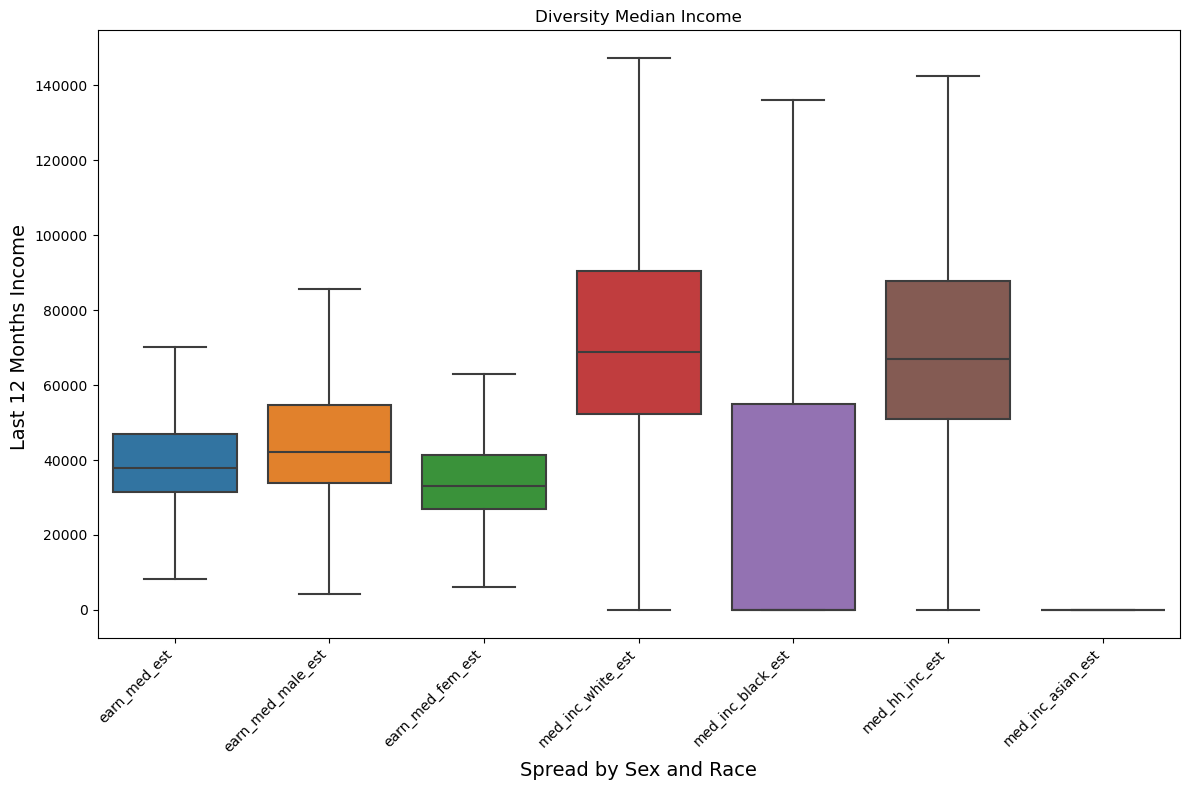

In [257]:
visuals = df_dropped
general_income_mask = ['earn_med_est','earn_med_male_est', 'earn_med_fem_est','med_inc_white_est','med_inc_black_est', 'med_hh_inc_est', 'med_inc_asian_est']
plt.figure(figsize=(12,8))
sns.boxplot(data=visuals[general_income_mask], showfliers=False)


plt.title('Diversity Median Income')
plt.xlabel('Spread by Sex and Race', fontsize=14)
plt.ylabel('Last 12 Months Income ', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

## Testing out GEOID using census data provided by US government

Providing maps for some of our data visualizations may prove to be helpful for some of the upcoming challenges, in addition to other visualizations other contributors will provide. In order to ensure that our data GEOID fields are valid, I obtained publicly available tract files for data mapping at https://data.census.gov/

### Simple Visualization of GEOID Data

Before committing to providing possible map solutions to some of the challenges, lets confirm that the data provided can be used by using GEO Pandas to plot a simple tract from one Florida county.

In [114]:
#path to shapefile
shapefile_path = 'tl_2020_12001_tract10.shp'
#reading in shapfile using GeoPandas
tracts = gpd.read_file(shapefile_path)
#testing with GEOID selected from df.head()
# Print all column names to verify
print("Columns in the shapefile:", tracts.columns.tolist())
test_tract = tracts[tracts['GEOID10'] == '12001000700']
# Check if the tract exists
if test_tract.empty:
    print("GEOID not found in the shapefile.")
else:
    # Display information about the tract
    print(test_tract)

Columns in the shapefile: ['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry']
   STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10    NAMELSAD10 MTFCC10  \
10        12        001    000700  12001000700      7  Census Tract   G5020   

   FUNCSTAT10   ALAND10  AWATER10   INTPTLAT10    INTPTLON10  \
10          S  22417196    457315  +29.6280432  -082.2957817   

                                             geometry  
10  POLYGON ((-82.32755 29.63571, -82.32729 29.636...  


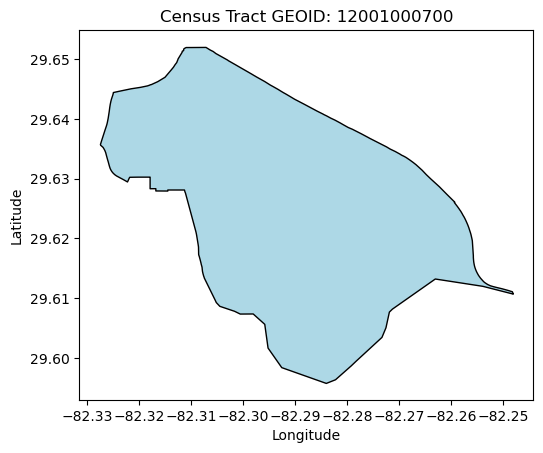

In [116]:
# Plot the specific Census Tract
test_tract.plot(edgecolor='black', color='lightblue')
plt.title('Census Tract GEOID: 12001000700')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()